In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# https://www.kaggle.com/code/nareshbhat/outlier-the-silent-killer

In [45]:
iris=pd.read_csv('iris.csv')

In [46]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [48]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [49]:
# No null values, doing EDA
# column Id has no relevance, so deleting that

In [50]:
iris.drop(columns=['Id'],axis=1,inplace=True)

### Univariate analysis

0.3149109566369728
0.3340526621720866
-0.27446425247378287
-0.10499656214412734


<Figure size 720x576 with 0 Axes>

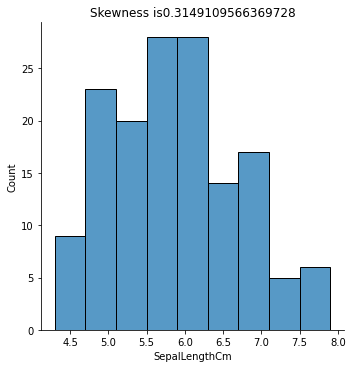

<Figure size 720x576 with 0 Axes>

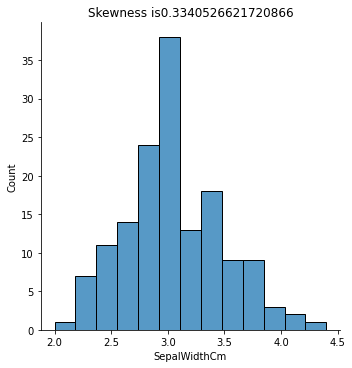

<Figure size 720x576 with 0 Axes>

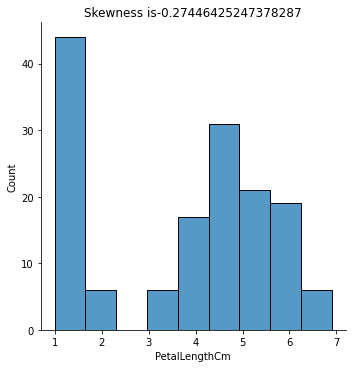

<Figure size 720x576 with 0 Axes>

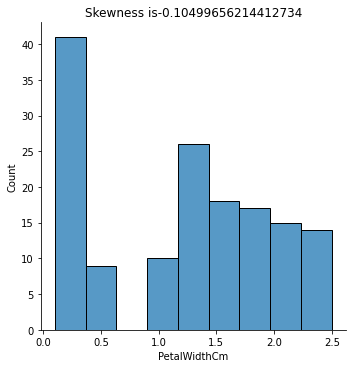

In [51]:
for x in iris.columns[:-1]:
    plt.figure(figsize=(10,8))
    skews=iris[x].skew()
    print(skews)
    sns.displot(data=iris,x=x)
    plt.title('Skewness is' +str(skews))

In [52]:
# The skewness values lies within -0.5 to +0.5, so it doesn't look like a skewed data, but the petal length
# columnns have high values near to 0, 

# Checking the outliers using box plot

<AxesSubplot: >

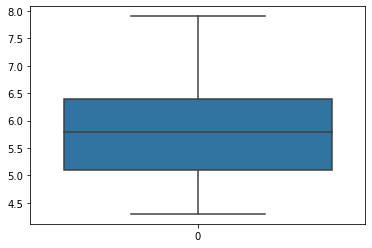

In [53]:
sns.boxplot(data=iris['SepalLengthCm'],)

<AxesSubplot: >

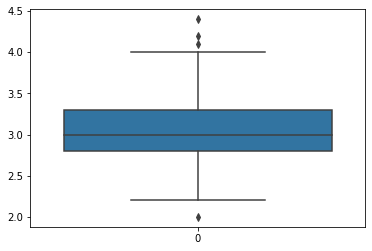

In [54]:
sns.boxplot(data=iris['SepalWidthCm'])

<AxesSubplot: >

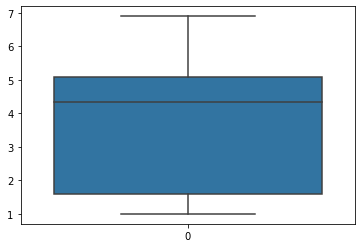

In [55]:
sns.boxplot(data=iris['PetalLengthCm'])

<AxesSubplot: >

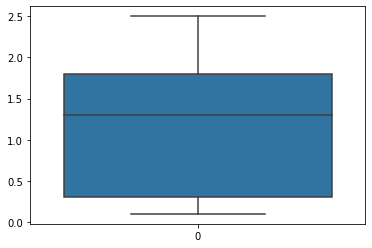

In [56]:
sns.boxplot(data=iris['PetalWidthCm'])

In [57]:
# There seems to be some outliers for sepalwidth column

# We will be doing some log transformation to remove these outliers as well as to normalize the above dataset

### Bi-Variate Analysis

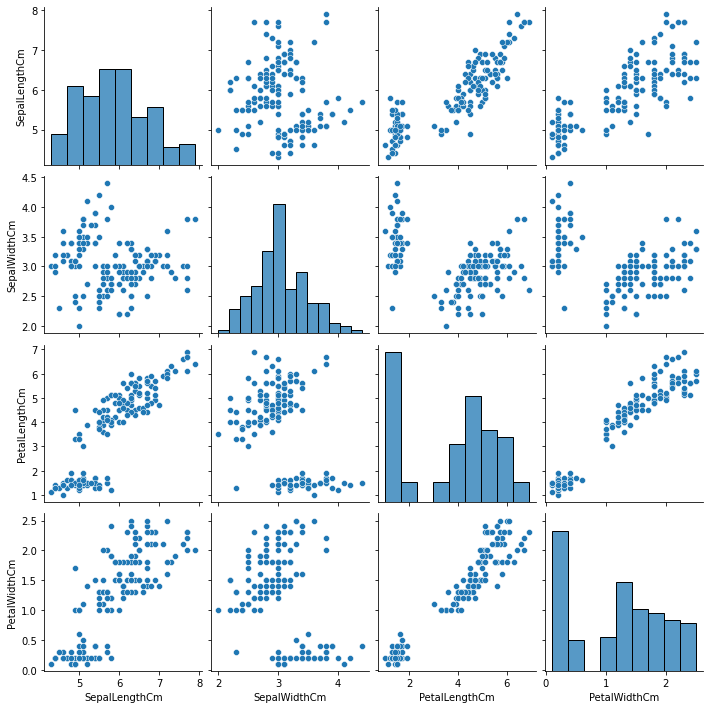

In [58]:
sns.pairplot(iris)

In [59]:
# Few learnings above, regrarding the correalation of these 4 variables

<AxesSubplot: >

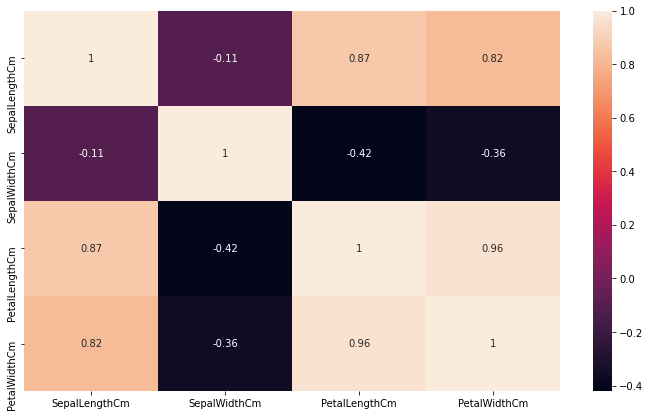

In [60]:
plt.figure(figsize=(12,7))
sns.heatmap(iris.corr(),annot=True)

In [61]:
# Normalizing via log transformation

In [62]:
for x in iris.columns[:-1]:
    iris[x]=np.log(iris[x])

In [63]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1.629241,1.252763,0.336472,-1.609438,Iris-setosa
1,1.589235,1.098612,0.336472,-1.609438,Iris-setosa
2,1.547563,1.163151,0.262364,-1.609438,Iris-setosa
3,1.526056,1.131402,0.405465,-1.609438,Iris-setosa
4,1.609438,1.280934,0.336472,-1.609438,Iris-setosa
...,...,...,...,...,...
145,1.902108,1.098612,1.648659,0.832909,Iris-virginica
146,1.840550,0.916291,1.609438,0.641854,Iris-virginica
147,1.871802,1.098612,1.648659,0.693147,Iris-virginica
148,1.824549,1.223775,1.686399,0.832909,Iris-virginica


## Applying Models

In [86]:
x_main

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1.629241,1.252763,0.336472,-1.609438
1,1.589235,1.098612,0.336472,-1.609438
2,1.547563,1.163151,0.262364,-1.609438
3,1.526056,1.131402,0.405465,-1.609438
4,1.609438,1.280934,0.336472,-1.609438
...,...,...,...,...
145,1.902108,1.098612,1.648659,0.832909
146,1.840550,0.916291,1.609438,0.641854
147,1.871802,1.098612,1.648659,0.693147
148,1.824549,1.223775,1.686399,0.832909


In [151]:
# Splitting the data-set into train and test
x_main=iris.drop(columns='Species',axis=1)
y_main=iris[['Species']]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_main,y_main,test_size=0.25)

In [152]:
# https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

#### Logistic regression

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

log_reg_pred=log_reg.predict(x_test)

In [154]:
confusion_matrix(y_test,log_reg_pred)

array([[19,  0,  0],
       [ 0,  8,  1],
       [ 0,  1,  9]])

In [155]:
accuracy_score(y_test,log_reg_pred)
# precision_score(y_test,log_reg_pred,average=None)

0.9473684210526315

#### Support Vector Classifier

In [156]:
from sklearn.svm import SVC

svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc_pred=svc.predict(x_test)

In [157]:
confusion_matrix(y_test,svc_pred)

array([[19,  0,  0],
       [ 0,  8,  1],
       [ 0,  1,  9]])

In [158]:
accuracy_score(y_test,svc_pred)

0.9473684210526315

#### Trees based models

In [159]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)

In [160]:
confusion_matrix(y_test,dt_pred)

array([[19,  0,  0],
       [ 0,  7,  2],
       [ 0,  0, 10]])

In [161]:
accuracy_score(y_test,dt_pred)

0.9473684210526315

#### Checking If PCA is doing anything

In [177]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_x_train=pca.fit_transform(x_train)
pca_x_test=pca.transform(x_test)


In [178]:
pca.explained_variance_ratio_.sum()

0.9822104317900591

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

log_reg=LogisticRegression()
log_reg.fit(pca_x_train,y_train)

log_reg_pred=log_reg.predict(pca_x_test)

In [180]:
confusion_matrix(y_test,log_reg_pred)

array([[19,  0,  0],
       [ 0,  8,  1],
       [ 0,  1,  9]])

In [181]:
accuracy_score(y_test,log_reg_pred)
# precision_score(y_test,log_reg_pred,average=None)

0.9473684210526315

In [182]:
from sklearn.svm import SVC

svc=SVC(kernel='rbf')
svc.fit(pca_x_train,y_train)
svc_pred=svc.predict(pca_x_test)

confusion_matrix(y_test,svc_pred)

accuracy_score(y_test,svc_pred)

0.9473684210526315

In [183]:
# Since there are not many dimensions, PCA doesn't help here